# Feature Engineering for Machine Learning in Python

1. Creating Features
2. Dealing with Messy Data
3. Conforming to Statistical Assumptions
4. Dealing with Text Data

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
df = pd.read_csv("Combined_DS_v10.csv")

In [3]:
df = df[df['Country'] != 'Russia']

In [14]:
df.dtypes

SurveyDate                     object
FormalEducation                object
ConvertedSalary               float64
Hobby                          object
Country                        object
StackOverflowJobsRecommend    float64
VersionControl                 object
Age                             int64
Years Experience                int64
Gender                         object
RawSalary                      object
dtype: object

In [4]:
df.head()

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,South Africa,NaN,Git,21,13,Male,NaN
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,Sweeden,7.0,Git;Subversion,38,9,Male,"70,841.00"
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,No,Sweeden,8.0,Git,45,11,NaN,NaN
3,5/9/18 1:06,Some college/university study without earning ...,21426.0,Yes,Sweeden,NaN,Zip file back-ups,46,12,Male,"21,426.00"
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,UK,8.0,Git,39,7,Male,"£41,671.00"


In [15]:
numeric_df = df.select_dtypes(include=["int", "float"])

In [16]:
numeric_df.columns

Index(['ConvertedSalary', 'StackOverflowJobsRecommend', 'Age',
       'Years Experience'],
      dtype='object')

## Encoding categorial  variables
1. **One-hot encoding:**
   - Explainable features
   
   

2. **Dummy encoding:**
   - Necessary information without duplication

In [17]:
one_hot_encoded = pd.get_dummies(df, columns=["Country"], prefix='OH')

In [18]:
one_hot_encoded.columns

Index(['SurveyDate', 'FormalEducation', 'ConvertedSalary', 'Hobby',
       'StackOverflowJobsRecommend', 'VersionControl', 'Age',
       'Years Experience', 'Gender', 'RawSalary', 'OH_France', 'OH_India',
       'OH_Ireland', 'OH_South Africa', 'OH_Spain', 'OH_Sweeden', 'OH_UK',
       'OH_USA', 'OH_Ukraine'],
      dtype='object')

In [22]:
dummy = pd.get_dummies(df, columns=["Country"], drop_first=True, prefix='DM')

In [23]:
dummy.columns

Index(['SurveyDate', 'FormalEducation', 'ConvertedSalary', 'Hobby',
       'StackOverflowJobsRecommend', 'VersionControl', 'Age',
       'Years Experience', 'Gender', 'RawSalary', 'DM_India', 'DM_Ireland',
       'DM_South Africa', 'DM_Spain', 'DM_Sweeden', 'DM_UK', 'DM_USA',
       'DM_Ukraine'],
      dtype='object')

## Encoding numeric variables

### Masking

In [5]:
countries = df.Country
country_counts = countries.value_counts()
print(country_counts)

South Africa    166
USA             164
Spain           134
Sweeden         119
France          115
UK               95
India            95
Ukraine           9
Ireland           5
Name: Country, dtype: int64


In [28]:
mask = countries.isin(country_counts[country_counts < 10].index)
mask.head()

0    False
1    False
2    False
3    False
4    False
Name: Country, dtype: bool

In [29]:
countries[mask] = 'Other'
countries.value_counts()

South Africa    166
USA             164
Spain           134
Sweeden         119
France          115
UK               95
India            95
Other            14
Name: Country, dtype: int64

### Binarizing

In [11]:
df['Paid_Job'] = 0
df.loc[df['ConvertedSalary'] > 0, 'Paid_Job'] = 1
df[['Paid_Job', 'ConvertedSalary']].head()

,Paid_Job,ConvertedSalary
0,0,NaN
1,1,70841.0
2,0,NaN
3,1,21426.0
4,1,41671.0


### Binning

In [32]:
df['equal_binned'] = pd.cut(df['ConvertedSalary'], bins=5)

print(df[['equal_binned', 'ConvertedSalary']].head())

          equal_binned  ConvertedSalary
0                  NaN              NaN
1  (-2000.0, 400000.0]          70841.0
2                  NaN              NaN
3  (-2000.0, 400000.0]          21426.0
4  (-2000.0, 400000.0]          41671.0


In [7]:
bins = [-np.inf, 10000, 50000, 100000, 150000, np.inf]

labels = ['Very low', 'Low', 'Medium', 'High', 'Very high']

df['boundary_binned'] = pd.cut(df['ConvertedSalary'], 
                                         bins=bins, labels=labels)

print(df[['boundary_binned', 'ConvertedSalary']].head())

  boundary_binned  ConvertedSalary
0             NaN              NaN
1          Medium          70841.0
2             NaN              NaN
3             Low          21426.0
4             Low          41671.0


## Dealing with messy data

In [17]:
sub_df = df[["Age", "Gender"]]

In [18]:
sub_df.notnull().sum()

Age       902
Gender    618
dtype: int64

In [19]:
sub_df.isnull().sum()

Age         0
Gender    284
dtype: int64

### Listwise deletion

In [22]:
df.shape

(902, 12)

In [21]:
no_missing_values_rows = df.dropna()
no_missing_values_rows.shape

(238, 12)

In [23]:
no_missing_values_cols = df.dropna(axis=1)
no_missing_values_cols.shape

(902, 8)

In [ ]:
no_gender = df.dropna(subset=["Gender"], axis=0)
no_gender.shape

### Replacing missing values with constants

In [25]:
df["Gender"].value_counts()

Male                                                      564
Female                                                     47
Female;Male                                                 2
Transgender                                                 2
Male;Non-binary. genderqueer. or gender non-conforming      1
Non-binary. genderqueer. or gender non-conforming           1
Female;Transgender                                          1
Name: Gender, dtype: int64

In [26]:
df["Gender"].fillna(value="Not Given", inplace = True)
df["Gender"].value_counts()

Male                                                      564
Not Given                                                 284
Female                                                     47
Female;Male                                                 2
Transgender                                                 2
Male;Non-binary. genderqueer. or gender non-conforming      1
Non-binary. genderqueer. or gender non-conforming           1
Female;Transgender                                          1
Name: Gender, dtype: int64

### Filling continious missing values

In [28]:
df["StackOverflowJobsRecommend"].head(5)

0    NaN
1    7.0
2    8.0
3    NaN
4    8.0
Name: StackOverflowJobsRecommend, dtype: float64

In [30]:
df["StackOverflowJobsRecommend"].fillna(df["StackOverflowJobsRecommend"].mean(), inplace=True)
df["StackOverflowJobsRecommend"].head(5)

0    7.045558
1    7.000000
2    8.000000
3    7.045558
4    8.000000
Name: StackOverflowJobsRecommend, dtype: float64

In [32]:
df["StackOverflowJobsRecommend"] = round(df["StackOverflowJobsRecommend"])
df["StackOverflowJobsRecommend"].head(5)

0    7.0
1    7.0
2    8.0
3    7.0
4    8.0
Name: StackOverflowJobsRecommend, dtype: float64

### Dealing with other data issues

In [38]:
df['RawSalary'] = df['RawSalary'].str.replace(',', '')
df['RawSalary'] = df['RawSalary'].str.replace('$', '')

C:\Users\admin\AppData\Local\Temp\ipykernel_9552\358242868.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['RawSalary'] = df['RawSalary'].str.replace('$', '')


In [46]:
numeric_vals = pd.to_numeric(df['RawSalary'], errors='coerce')

idx = numeric_vals.isna()

df.loc[idx, "RawSalary"] # df["RawSalary"][idx]

0     NaN
2     NaN
6     NaN
8     NaN
11    NaN
       ..
989   NaN
990   NaN
992   NaN
994   NaN
997   NaN
Name: RawSalary, Length: 306, dtype: float64

In [47]:
df["RawSalary"]

0          NaN
1      70841.0
2          NaN
3      21426.0
4      41671.0
        ...   
993    30000.0
994        NaN
995    58746.0
996    55000.0
997        NaN
Name: RawSalary, Length: 902, dtype: float64

In [40]:
df['RawSalary'] = df['RawSalary'].str.replace("£", "")

df['RawSalary'] = df['RawSalary'].astype("float")

df['RawSalary']

0          NaN
1      70841.0
2          NaN
3      21426.0
4      41671.0
        ...   
993    30000.0
994        NaN
995    58746.0
996    55000.0
997        NaN
Name: RawSalary, Length: 902, dtype: float64

## Conforming to Statistical Assumptions

### Data Distributions

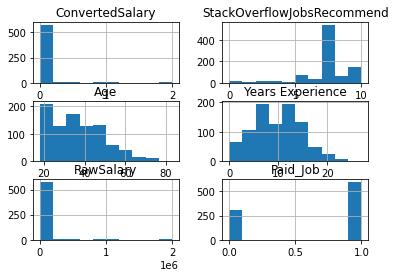

In [49]:
df.hist()
plt.show()

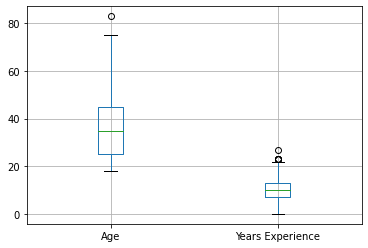

In [50]:
df[["Age", "Years Experience"]].boxplot()
plt.show()

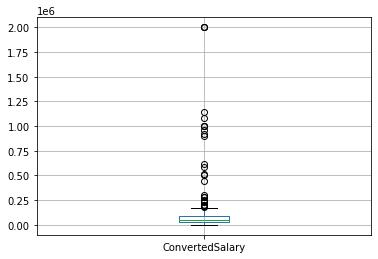

In [51]:
df[["ConvertedSalary"]].boxplot()
plt.show()

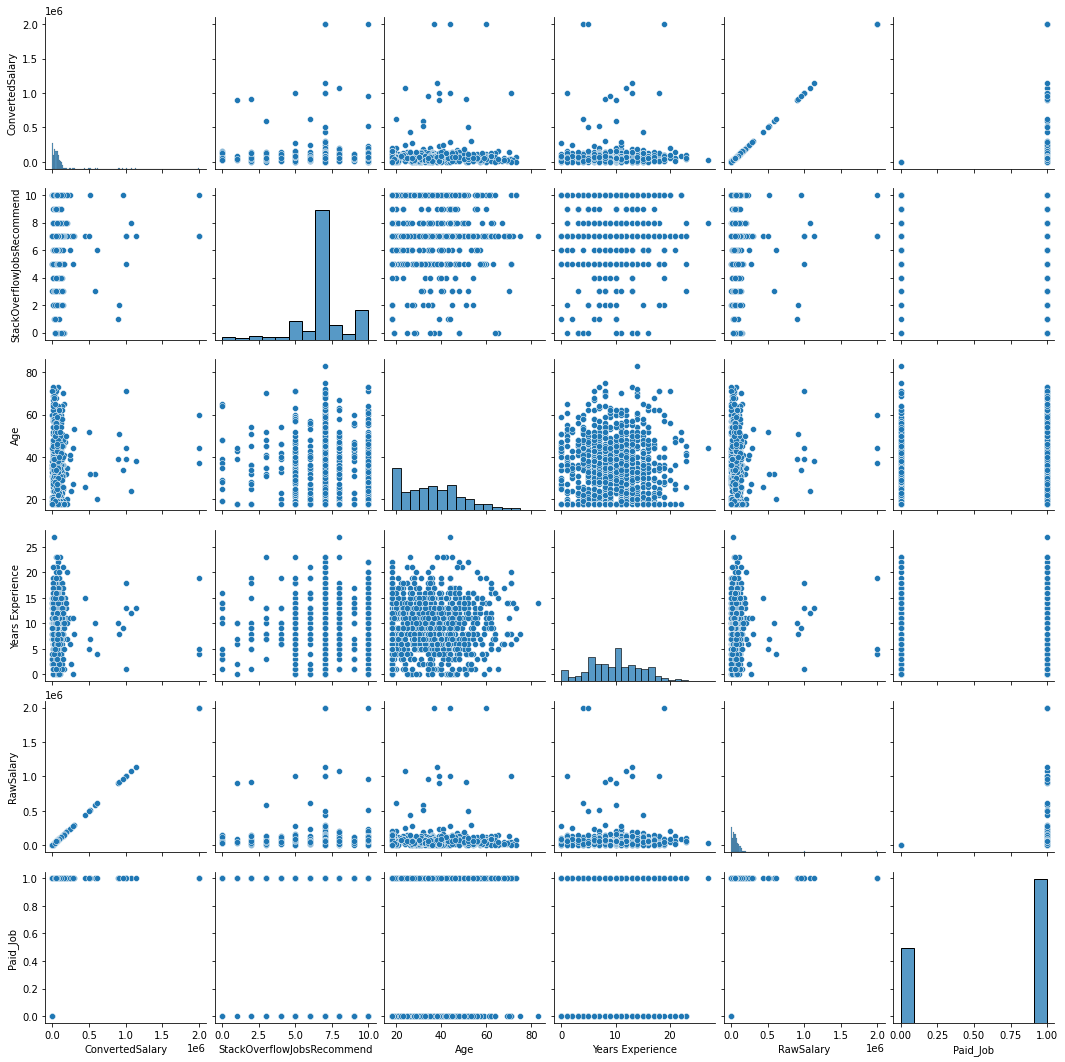

In [53]:
sns.pairplot(df)
plt.show()

In [54]:
df.describe()

,ConvertedSalary,StackOverflowJobsRecommend,Age,Years Experience,RawSalary,Paid_Job
count,5.960000e+02,902.000000,902.000000,902.000000,5.960000e+02,902.000000
mean,8.589639e+04,7.022173,36.032151,9.905765,8.589639e+04,0.658537
std,1.849308e+05,1.823377,13.196713,4.872969,1.849308e+05,0.474464
min,0.000000e+00,0.000000,18.000000,0.000000,0.000000e+00,0.000000
25%,2.530200e+04,7.000000,25.000000,7.000000,2.530200e+04,0.000000
50%,5.357200e+04,7.000000,35.000000,10.000000,5.357200e+04,1.000000
75%,8.634000e+04,7.000000,45.000000,13.000000,8.634000e+04,1.000000
max,2.000000e+06,10.000000,83.000000,27.000000,2.000000e+06,1.000000


### Scaling and transformations

1. **Normalization** : scale values between upper and lower bound

In [59]:
MM_scaler = MinMaxScaler()
MM_scaler.fit(df[["Age"]])
df["Age_MM"] = MM_scaler.transform(df[["Age"]])
df[["Age_MM", "Age"]]

,Age_MM,Age
0,0.046154,21
1,0.307692,38
2,0.415385,45
3,0.430769,46
4,0.323077,39
...,...,...
993,0.153846,28
994,0.415385,45
995,0.138462,27
996,0.553846,54


2. **Standartization**: center data around the mean and calculate the number of std each data point is far away from the mean (useful when even one of the columns is affected by outliers)

In [62]:
SS_scaler = StandardScaler()
SS_scaler.fit(df[["Age"]])
df["Age_SS"] = SS_scaler.transform(df[["Age"]])
df[["Age_SS", "Age"]]

,Age_SS,Age
0,-1.139715,21
1,0.149199,38
2,0.679929,45
3,0.755747,46
4,0.225018,39
...,...,...
993,-0.608985,28
994,0.679929,45
995,-0.684804,27
996,1.362295,54


3. **Log Transformation**: prevous techniques are useful when data is (closely) normally distributed. Log Transformation is a goood choice when most of the data is centered around low values but also contains larger ones

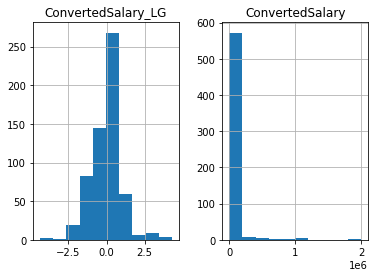

In [65]:
pow_trans = PowerTransformer()
pow_trans.fit(df[["ConvertedSalary"]])
df["ConvertedSalary_LG"] = pow_trans.transform(df[["ConvertedSalary"]])
df[["ConvertedSalary_LG", "ConvertedSalary"]].hist()
plt.show()

4. **Removing outliers**
- remove certain percantage of the highest/lowest value (calc percentile). It will remove N percents of the data even if there is no outliers
- remove data point that are higher/lower than 3std

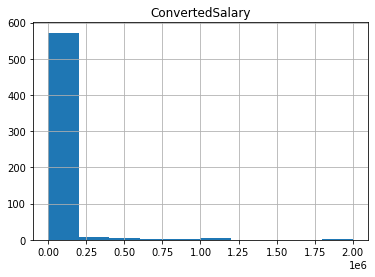

<Figure size 432x288 with 0 Axes>

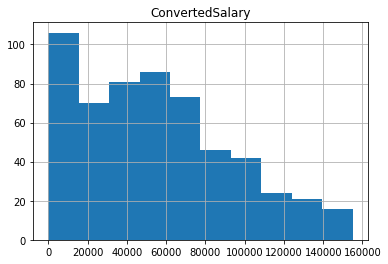

In [68]:
quantile = df["ConvertedSalary"].quantile(0.95)
trimmed_df = df[df["ConvertedSalary"] < quantile]
df[["ConvertedSalary"]].hist()
plt.show()
plt.clf()

trimmed_df[["ConvertedSalary"]].hist()
plt.show()

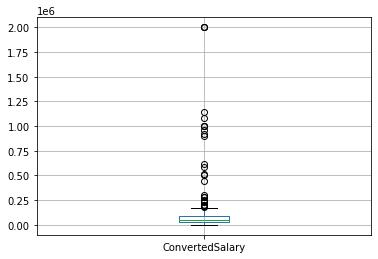

In [69]:
std = df["ConvertedSalary"].std()
mean = df["ConvertedSalary"].mean()

cut_off = mean * 3
lower, upper = mean - cut_off, mean + cut_off
trimmed_df = df[(df["ConvertedSalary"] > lower) & df["ConvertedSalary"] < upper]
trimmed_df[["ConvertedSalary"]].boxplot()
plt.show()

### Train and Testing transformations

In [71]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [72]:
SS_scaler.fit(df_train[["Age"]])
df_test["Age_SS"] = SS_scaler.transform(df_test[["Age"]])
df_test[["Age_SS", "Age"]]

,Age_SS,Age
11,0.301565,42
416,0.141965,40
275,-1.454036,20
429,-0.257035,35
480,-0.815636,28
...,...,...
120,0.381365,43
300,-0.336836,34
950,1.099565,52
482,-0.735836,29


In [ ]:
train_std = df_train['ConvertedSalary'].std()
train_mean = df_test['ConvertedSalary'].mean()

cut_off = train_std * 3
train_lower, train_upper = train_mean - cut_off, train_mean + cut_off

# Trim the test DataFrame
trimmed_df = df_test[(df_test['ConvertedSalary'] < train_upper) \
                             & (df_test['ConvertedSalary'] > train_lower)]

## Dealing with text data

In [75]:
speech_df = pd.read_csv("inaugural_speeches.csv")

### Encoding text

In [77]:
speech_df["text"].head(5)

0    Fellow-Citizens of the Senate and of the House...
1    Fellow Citizens:  I AM again called upon by th...
2    WHEN it was first perceived, in early times, t...
3    Friends and Fellow-Citizens:  CALLED upon to u...
4    PROCEEDING, fellow-citizens, to that qualifica...
Name: text, dtype: object

In [80]:
speech_df['text_clean'] = speech_df['text'].str.replace('[^a-zA-Z]', ' ')

speech_df['text_clean'] = speech_df['text_clean'].str.lower()

speech_df['text_clean'].head()

C:\Users\admin\AppData\Local\Temp\ipykernel_9552\2221067115.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  speech_df['text_clean'] = speech_df['text'].str.replace('[^a-zA-Z]', ' ')


0    fellow citizens of the senate and of the house...
1    fellow citizens   i am again called upon by th...
2    when it was first perceived  in early times  t...
3    friends and fellow citizens   called upon to u...
4    proceeding  fellow citizens  to that qualifica...
Name: text_clean, dtype: object

In [81]:
speech_df['char_cnt'] = speech_df['text_clean'].str.len()

speech_df['word_cnt'] = speech_df['text_clean'].str.split().str.len()

speech_df['avg_word_length'] = speech_df['char_cnt'] / speech_df['word_cnt']

speech_df[['text_clean', 'char_cnt', 'word_cnt', 'avg_word_length']]

,text_clean,char_cnt,word_cnt,avg_word_length
0,fellow citizens of the senate and of the house...,8616,1432,6.016760
1,fellow citizens i am again called upon by th...,787,135,5.829630
2,when it was first perceived in early times t...,13871,2323,5.971158
3,friends and fellow citizens called upon to u...,10144,1736,5.843318
4,proceeding fellow citizens to that qualifica...,12902,2169,5.948363
...,...,...,...,...
53,president clinton distinguished guests and my...,9084,1606,5.656289
54,vice president cheney mr chief justice pres...,12199,2122,5.748822
55,my fellow citizens i stand here today humb...,13637,2452,5.561582
56,vice president biden mr chief justice membe...,12174,2151,5.659693


### Word Counts

In [82]:
cv = CountVectorizer()

cv.fit(speech_df['text_clean'])

print(cv.get_feature_names())

['abandon', 'abandoned', 'abandonment', 'abate', 'abdicated', 'abeyance', 'abhorring', 'abide', 'abiding', 'abilities', 'ability', 'abject', 'able', 'ably', 'abnormal', 'abode', 'abolish', 'abolished', 'abolishing', 'aboriginal', 'aborigines', 'abound', 'abounding', 'abounds', 'about', 'above', 'abraham', 'abreast', 'abridging', 'abroad', 'absence', 'absent', 'absolute', 'absolutely', 'absolutism', 'absorb', 'absorbed', 'absorbing', 'absorbs', 'abstain', 'abstaining', 'abstract', 'abstractions', 'absurd', 'abundance', 'abundant', 'abundantly', 'abuse', 'abused', 'abuses', 'academies', 'accept', 'acceptance', 'accepted', 'accepting', 'accepts', 'access', 'accessible', 'accession', 'accident', 'accidental', 'accidents', 'acclaim', 'accommodation', 'accommodations', 'accompanied', 'accompany', 'accomplish', 'accomplished', 'accomplishing', 'accomplishment', 'accomplishments', 'accord', 'accordance', 'accorded', 'according', 'accordingly', 'accords', 'account', 'accountability', 'accountab

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [83]:
cv_transformed = cv.transform(speech_df['text_clean'])

cv_array = cv_transformed.toarray()
print(cv_array)
print(cv_array.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(58, 9043)


In [85]:
cv = CountVectorizer(min_df=0.2, max_df=0.8)

cv_transformed = cv.fit_transform(speech_df['text_clean'])
cv_array = cv_transformed.toarray()

cv_array.shape

(58, 818)

In [86]:
cv_df = pd.DataFrame(cv_transformed.toarray(), columns=cv.get_feature_names()).add_prefix('Counts_')

speech_df_new = pd.concat([speech_df, cv_df], axis=1, sort=False)
speech_df_new.head()

,Name,Inaugural Address,Date,text,text_clean,char_cnt,word_cnt,avg_word_length,Counts_abiding,Counts_ability,...,Counts_women,Counts_words,Counts_work,Counts_wrong,Counts_year,Counts_years,Counts_yet,Counts_you,Counts_young,Counts_your
0,George Washington,First Inaugural Address,"Thursday, April 30, 1789",Fellow-Citizens of the Senate and of the House...,fellow citizens of the senate and of the house...,8616,1432,6.016760,0,0,...,0,0,0,0,0,1,0,5,0,9
1,George Washington,Second Inaugural Address,"Monday, March 4, 1793",Fellow Citizens: I AM again called upon by th...,fellow citizens i am again called upon by th...,787,135,5.829630,0,0,...,0,0,0,0,0,0,0,0,0,1
2,John Adams,Inaugural Address,"Saturday, March 4, 1797","WHEN it was first perceived, in early times, t...",when it was first perceived in early times t...,13871,2323,5.971158,0,0,...,0,0,0,0,2,3,0,0,0,1
3,Thomas Jefferson,First Inaugural Address,"Wednesday, March 4, 1801",Friends and Fellow-Citizens: CALLED upon to u...,friends and fellow citizens called upon to u...,10144,1736,5.843318,0,0,...,0,0,1,2,0,0,2,7,0,7
4,Thomas Jefferson,Second Inaugural Address,"Monday, March 4, 1805","PROCEEDING, fellow-citizens, to that qualifica...",proceeding fellow citizens to that qualifica...,12902,2169,5.948363,0,0,...,0,0,0,0,2,2,2,4,0,4


### Tf-Idf Representation

In [89]:
tv = TfidfVectorizer(max_features=100, stop_words='english')

tv_transformed = tv.fit_transform(speech_df['text_clean'])

tv_df = pd.DataFrame(tv_transformed.toarray(), columns=tv.get_feature_names()).add_prefix('TFIDF_')
tv_df.head()

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,TFIDF_action,TFIDF_administration,TFIDF_america,TFIDF_american,TFIDF_americans,TFIDF_believe,TFIDF_best,TFIDF_better,TFIDF_change,TFIDF_citizens,...,TFIDF_things,TFIDF_time,TFIDF_today,TFIDF_union,TFIDF_united,TFIDF_war,TFIDF_way,TFIDF_work,TFIDF_world,TFIDF_years
0,0.000000,0.133415,0.000000,0.105388,0.0,0.000000,0.000000,0.000000,0.000000,0.229644,...,0.000000,0.045929,0.0,0.136012,0.203593,0.000000,0.060755,0.000000,0.045929,0.052694
1,0.000000,0.261016,0.266097,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.179712,...,0.000000,0.000000,0.0,0.000000,0.199157,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.092436,0.157058,0.073018,0.0,0.000000,0.026112,0.060460,0.000000,0.106072,...,0.032030,0.021214,0.0,0.062823,0.070529,0.024339,0.000000,0.000000,0.063643,0.073018
3,0.000000,0.092693,0.000000,0.000000,0.0,0.090942,0.117831,0.045471,0.053335,0.223369,...,0.048179,0.000000,0.0,0.094497,0.000000,0.036610,0.000000,0.039277,0.095729,0.000000
4,0.041334,0.039761,0.000000,0.031408,0.0,0.000000,0.067393,0.039011,0.091514,0.273760,...,0.082667,0.164256,0.0,0.121605,0.030338,0.094225,0.000000,0.000000,0.054752,0.062817


In [90]:
sample_row = tv_df.iloc[0]

sample_row.sort_values(ascending=False).head(5)

TFIDF_government    0.367430
TFIDF_public        0.333237
TFIDF_present       0.315182
TFIDF_duty          0.238637
TFIDF_country       0.229644
Name: 0, dtype: float64

In [92]:
train_speech_df, test_speech_df = train_test_split(speech_df, test_size=0.2, random_state=42)

In [93]:
tv = TfidfVectorizer(max_features=100, stop_words='english')

tv_transformed = tv.fit_transform(train_speech_df['text_clean'])

test_tv_transformed = tv.transform(test_speech_df['text_clean'])

test_tv_df = pd.DataFrame(test_tv_transformed.toarray(), columns=tv.get_feature_names()).add_prefix('TFIDF_')
test_tv_df.head()

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,TFIDF_administration,TFIDF_america,TFIDF_american,TFIDF_americans,TFIDF_believe,TFIDF_best,TFIDF_business,TFIDF_citizens,TFIDF_come,TFIDF_commerce,...,TFIDF_things,TFIDF_time,TFIDF_today,TFIDF_union,TFIDF_united,TFIDF_war,TFIDF_way,TFIDF_work,TFIDF_world,TFIDF_years
0,0.130996,0.000000,0.106750,0.000000,0.000000,0.000000,0.000000,0.234396,0.000000,0.000000,...,0.000000,0.045888,0.00000,0.140922,0.191579,0.000000,0.061058,0.000000,0.046879,0.053375
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.194054,0.000000,0.054359,0.000000,0.159419,...,0.000000,0.053210,0.00000,0.163408,0.166611,0.063268,0.000000,0.000000,0.108719,0.000000
2,0.071785,0.200906,0.058499,0.000000,0.023369,0.081518,0.065955,0.034253,0.070106,0.000000,...,0.025742,0.050293,0.00000,0.000000,0.034995,0.059800,0.044613,0.042626,0.222644,0.038999
3,0.028327,0.000000,0.069252,0.000000,0.041496,0.036188,0.000000,0.101373,0.013832,0.000000,...,0.030473,0.019846,0.00000,0.091420,0.093212,0.023597,0.013203,0.012615,0.010137,0.046168
4,0.000000,0.129432,0.200999,0.051832,0.160586,0.070023,0.000000,0.029423,0.040147,0.000000,...,0.000000,0.115202,0.09305,0.398012,0.000000,0.034245,0.153288,0.109845,0.205960,0.100500


## N-grams

In [95]:
cv_trigram_vec = CountVectorizer(max_features=100, stop_words='english', ngram_range=(3,3))

cv_trigram = cv_trigram_vec.fit_transform(speech_df['text_clean'])

cv_trigram_vec.get_feature_names()

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['ability preserve protect',
 'agriculture commerce manufactures',
 'america ideal freedom',
 'amity mutual concession',
 'anchor peace home',
 'ask bow heads',
 'best ability preserve',
 'best interests country',
 'bless god bless',
 'bless united states',
 'chief justice mr',
 'children children children',
 'citizens united states',
 'civil religious liberty',
 'civil service reform',
 'commerce united states',
 'confidence fellow citizens',
 'congress extraordinary session',
 'constitution does expressly',
 'constitution united states',
 'coordinate branches government',
 'day task people',
 'defend constitution united',
 'distinction powers granted',
 'distinguished guests fellow',
 'does expressly say',
 'equal exact justice',
 'era good feeling',
 'executive branch government',
 'faithfully execute office',
 'fellow citizens assembled',
 'fellow citizens called',
 'fellow citizens large',
 'fellow citizens world',
 'form perfect union',
 'general welfare secure',
 'god bless amer

In [97]:
cv_tri_df = pd.DataFrame(cv_trigram.toarray(), 
                 columns=cv_trigram_vec.get_feature_names()).add_prefix('Counts_')


cv_tri_df.sum().sort_values(ascending=False).head()

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Counts_constitution united states    20
Counts_people united states          13
Counts_mr chief justice              10
Counts_preserve protect defend       10
Counts_president united states        8
dtype: int64